# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys_FJGD import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 546


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+'?q='+str(city)+'&appid='+weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') #Time of data calculation, unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | inongo
Processing Record 2 of Set 1 | stephenville
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | severo-yeniseyskiy
Processing Record 5 of Set 1 | magadan
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | nkove
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | akureyri
Processing Record 11 of Set 1 | shahecheng
Processing Record 12 of Set 1 | les cayes
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | pabrade
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | bandrele
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          521
Lat           521
Lng           521
Max Temp      521
Humidity      521
Cloudiness    521
Wind Speed    521
Country       521
Date          521
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inongo,-1.9500,18.2667,297.55,53,29,0.59,CD,2023-07-15 20:25:27
1,stephenville,32.2207,-98.2023,311.90,36,0,5.14,US,2023-07-15 20:21:11
2,grytviken,-54.2811,-36.5092,268.19,78,4,2.79,GS,2023-07-15 20:25:28
3,severo-yeniseyskiy,60.3725,93.0408,283.81,74,100,2.74,RU,2023-07-15 20:25:29
4,magadan,59.5667,150.8000,286.13,79,41,1.20,RU,2023-07-15 20:25:29


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inongo,-1.9500,18.2667,297.55,53,29,0.59,CD,2023-07-15 20:25:27
1,stephenville,32.2207,-98.2023,311.90,36,0,5.14,US,2023-07-15 20:21:11
2,grytviken,-54.2811,-36.5092,268.19,78,4,2.79,GS,2023-07-15 20:25:28
3,severo-yeniseyskiy,60.3725,93.0408,283.81,74,100,2.74,RU,2023-07-15 20:25:29
4,magadan,59.5667,150.8000,286.13,79,41,1.20,RU,2023-07-15 20:25:29


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

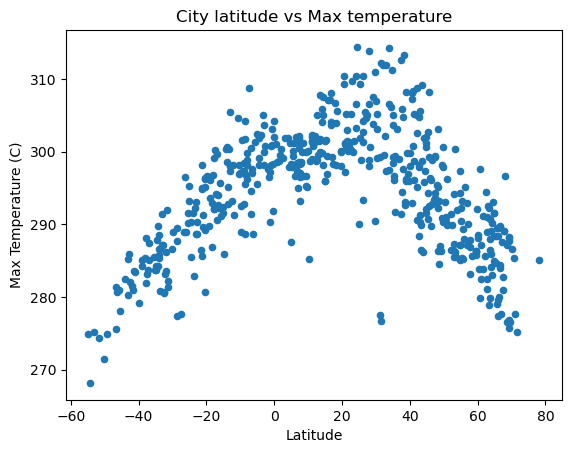

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter('Lat','Max Temp')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City latitude vs Max temperature')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

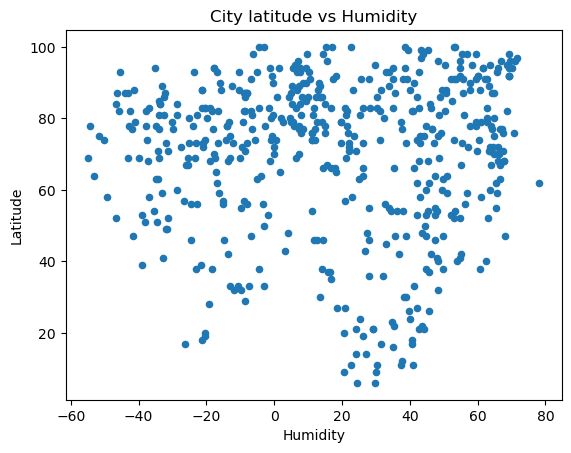

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter('Lat','Humidity')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('City latitude vs Humidity')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot

plt.show()

#### Latitude Vs. Cloudiness

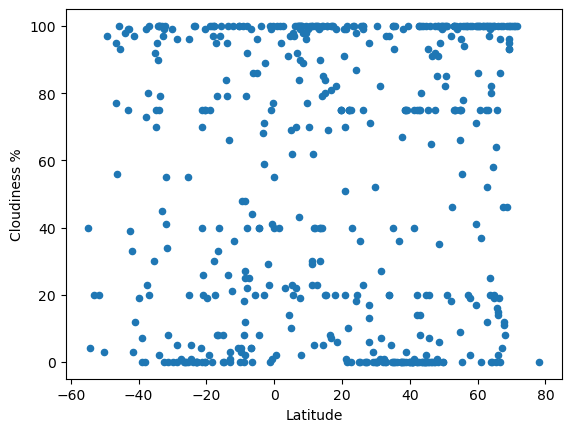

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

city_data_df.plot.scatter('Lat','Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

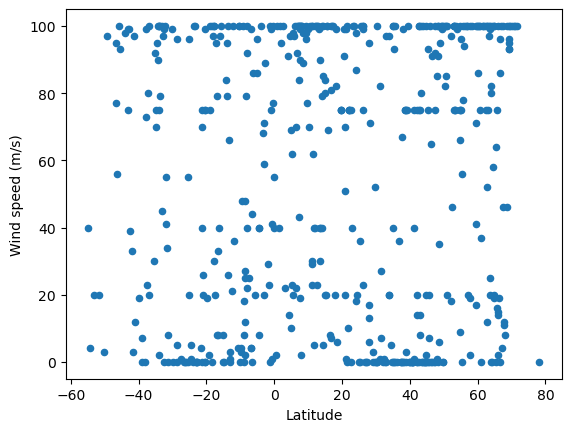

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter('Lat','Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plots(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.copy()
northern_hemi_df=northern_hemi_df.loc[northern_hemi_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stephenville,32.2207,-98.2023,311.90,36,0,5.14,US,2023-07-15 20:21:11
3,severo-yeniseyskiy,60.3725,93.0408,283.81,74,100,2.74,RU,2023-07-15 20:25:29
4,magadan,59.5667,150.8000,286.13,79,41,1.20,RU,2023-07-15 20:25:29
6,whitehorse,60.7161,-135.0538,297.65,38,75,5.66,CA,2023-07-15 20:25:30
9,akureyri,65.6835,-18.0878,279.11,93,75,6.17,IS,2023-07-15 20:25:32


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.copy()
southern_hemi_df=southern_hemi_df.loc[southern_hemi_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,inongo,-1.9500,18.2667,297.55,53,29,0.59,CD,2023-07-15 20:25:27
2,grytviken,-54.2811,-36.5092,268.19,78,4,2.79,GS,2023-07-15 20:25:28
5,port-aux-francais,-49.3500,70.2167,274.90,58,97,5.15,TF,2023-07-15 20:25:30
7,nkove,-7.9500,30.8500,296.18,56,22,1.47,TZ,2023-07-15 20:25:31
8,punta arenas,-53.1500,-70.9167,275.21,64,20,9.77,CL,2023-07-15 20:24:18


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.41804397309732727


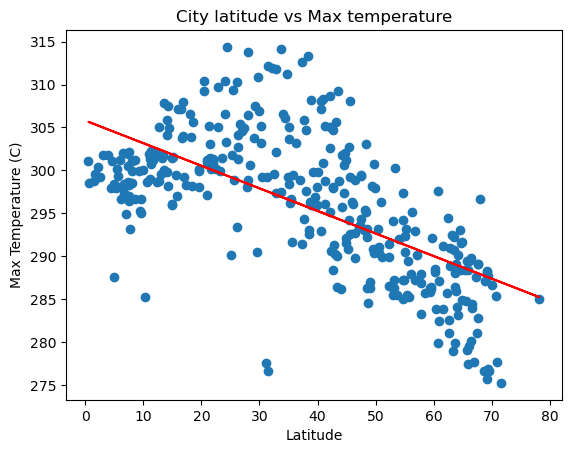

In [36]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City latitude vs Max temperature')
plt.show()

The r-value is: 0.7326375085142746


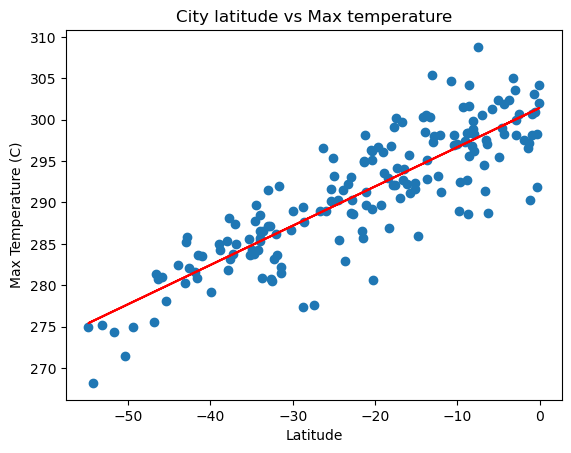

In [37]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title('City latitude vs Max temperature')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0010669394640690979


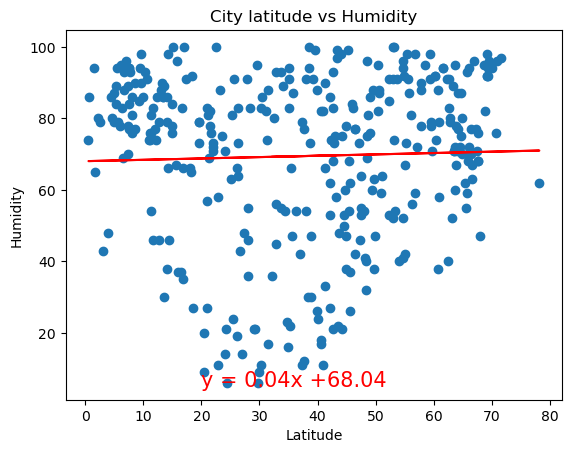

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City latitude vs Humidity')
plt.show()

The r-value is: 8.171420107068528e-06


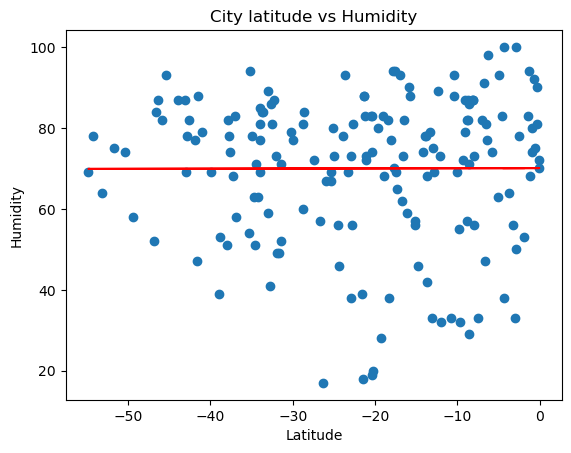

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City latitude vs Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0004392204425319132


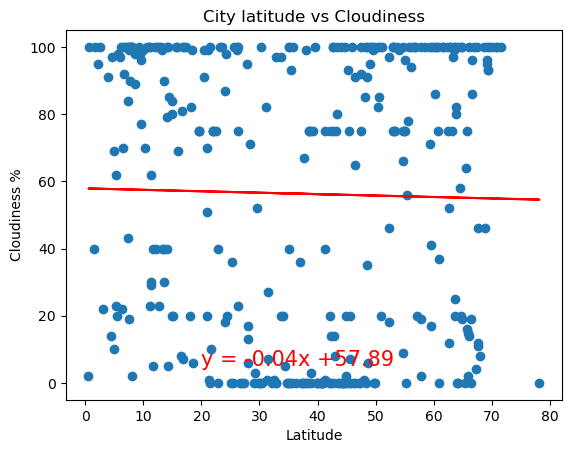

In [40]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.title('City latitude vs Cloudiness')
plt.show()

The r-value is: 0.0038571147148609075


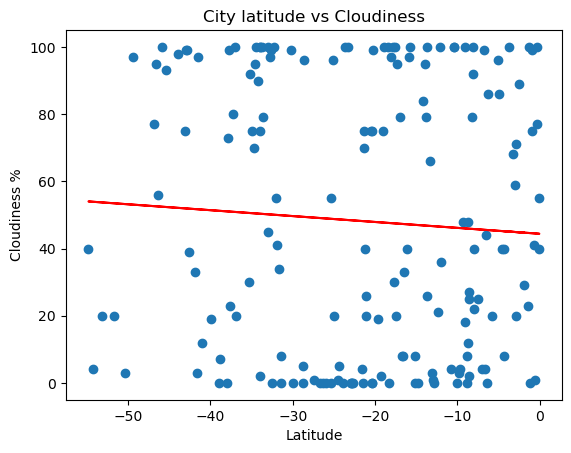

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.title('City latitude vs Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02372926921888676


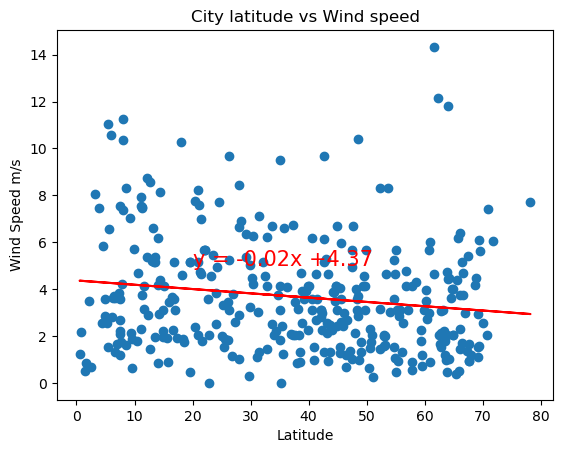

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed m/s')
plt.xlabel('Latitude')
plt.title('City latitude vs Wind speed')
plt.show()

The r-value is: 0.054225674474170205


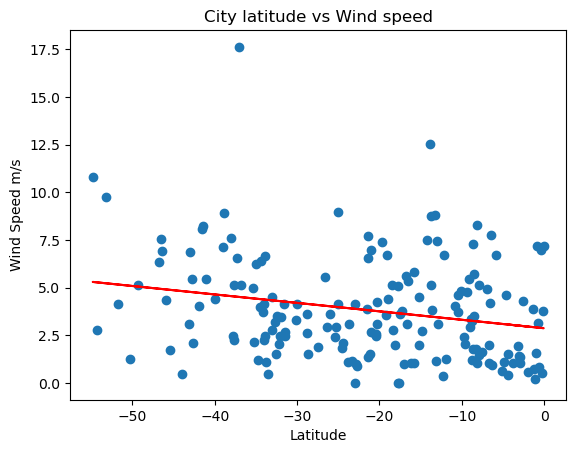

In [43]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed m/s')
plt.xlabel('Latitude')
plt.title('City latitude vs Wind speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE